# TAREA

Daniel Orozco

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate
import scipy.special as special

In [8]:
# vector de 10, 100, 1000, 10000 y 100000 términos 
N = np.logspace(1,5,5)

# integracion de montecarlo
def montecarlo(f, N, a, b) : 
    u = np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)

# tabla de resultados por aproximación y errores
table = pd.DataFrame(columns=["Aproximación 1", "Error 1","Aproximación 2", "Error 2"], index=N)

In [10]:
#funcion 1
def f1(x):
    return np.exp(x)*np.log10(x)

#aproximacion
for i in N :
    table.loc[i, "Aproximación 1"] = montecarlo(f1, int(i), 1, 3)

#integral
result1 =  integrate.quad(lambda x: np.exp(x)*np.log10(x), 1, 3)
result1 = result1[0]

#error
table["Error 1"] = np.abs(result1 - table["Aproximación 1"])

In [11]:
#funcion 2
def f2(x):
    return np.sin(x)*np.log(x)

#aproximacion
for i in N :
    table.loc[i, "Aproximación 2"] = montecarlo(f2, int(i), 1, 3)

#integral
result2 =  integrate.quad(lambda x: np.sin(x)*np.log(x), 1, 3)
result2 = result2[0]

#error
table["Error 2"] = np.abs(result2 - table["Aproximación 2"])

In [12]:
table

,Aproximación 1,Error 1,Aproximación 2,Error 2
10.0,6.497159,0.405092,0.914708,0.044864
100.0,6.339439,0.247372,0.857212,0.012632
1000.0,5.897375,0.194693,0.869547,0.000297
10000.0,6.048857,0.04321,0.863983,0.005861
100000.0,6.062732,0.029336,0.870563,0.000719


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

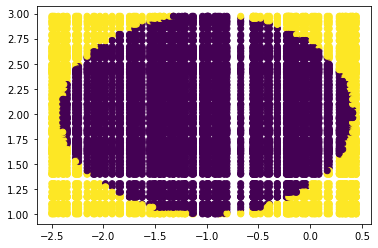

In [19]:
def montecarlo2(region, ax, bx, ay, by, N) :
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x,y)
    AR = (bx - ax)*(by - ay)
    return np.mean(B)*AR

def bernoulli(x,y):
    return (x**2 + 2*y**2 <= -2*x+8*y-7)

x = np.random.uniform(-2.5, .5, 100)
y = np.random.uniform(1, 3, 100)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X,Y, c=~bernoulli(X,Y))

In [20]:
montecarlo2(bernoulli, -2.5, 0.5, 1, 3, 50000)

4.43652

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

- Caso 1: Para aproximar el valor de una opción tipo call asiática se requiere resolver la siguiente integral:
$$ V_0=e^{-r T} E\left(\frac{1}{T} \int_0^T S_u d u-K\right) $$

- Caso 2: Los valores de z, de una función de distribución acumulada de una distribución normal estándar con media cero y desviación estándar uno se calculan de la siguiente manera:

$$ \Phi(z)=\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^z e^{-t^2 / 2} d t $$

Sirve para calcular probabilidades para esperanza de variables aleatorias tales como las del proceso de Weiner, utilizadas en cálculo estocástico.

- Caso 3: Para reducir varianza en una variable aleatoria, se necesita resolver la siguiente ecuación, que incluye integrales:
$$ E\left[e^{-r T}\left(e^{+\int_0^T \ln \left(S_u\right) d u}-K\right)_{+}\right] = e^{-\frac{1}{2}\left[r+\frac{g^2}{d}\right] T} S_0 N\left(d_1\right)-K e^{-r T} N\left(d_2\right) $$